In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
df_train = pd.read_csv("C:\\Users\\Dell\\Downloads\\archive\\twitter_training.csv", sep=',', names=['Id', 'Country', 'Label', 'Text'])
df_train.head()

,Id,Country,Label,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [3]:
df_train.shape

(74682, 4)

In [4]:
df_val = pd.read_csv("C:\\Users\\Dell\\Downloads\\archive\\twitter_validation.csv", sep=',', names=['Id', 'Company', 'Label', 'Text'])
df_val.head()

,Id,Company,Label,Text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [5]:
df_val.shape

(1000, 4)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Id       74682 non-null  int64 
 1   Country  74682 non-null  object
 2   Label    74682 non-null  object
 3   Text     73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [7]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Id       1000 non-null   int64 
 1   Company  1000 non-null   object
 2   Label    1000 non-null   object
 3   Text     1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [8]:
for data in [df_train, df_val]:
    data.drop(columns=['Id'], inplace=True)
    print(data.head())
    print("\n")

       Country     Label                                               Text
0  Borderlands  Positive  im getting on borderlands and i will murder yo...
1  Borderlands  Positive  I am coming to the borders and I will kill you...
2  Borderlands  Positive  im getting on borderlands and i will kill you ...
3  Borderlands  Positive  im coming on borderlands and i will murder you...
4  Borderlands  Positive  im getting on borderlands 2 and i will murder ...


     Company       Label                                               Text
0   Facebook  Irrelevant  I mentioned on Facebook that I was struggling ...
1     Amazon     Neutral  BBC News - Amazon boss Jeff Bezos rejects clai...
2  Microsoft    Negative  @Microsoft Why do I pay for WORD when it funct...
3      CS-GO    Negative  CSGO matchmaking is so full of closet hacking,...
4     Google     Neutral  Now the President is slapping Americans in the...




In [9]:
for data in [df_train,df_val]:
    print(data.isnull().sum())
    print("\n")

Country      0
Label        0
Text       686
dtype: int64


Company    0
Label      0
Text       0
dtype: int64




In [10]:
df_train['Text'].fillna(df_train['Text'].mode()[0], inplace=True)
df_train.isnull().sum()

Country    0
Label      0
Text       0
dtype: int64

In [11]:
import re
def preprocess_text(text):

    if pd.isna(text):
       return ""
    
    text = text.lower()

    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    return text

df_train['Text'] = df_train['Text'].apply(preprocess_text)
df_val['Text'] = df_val['Text'].apply(preprocess_text)

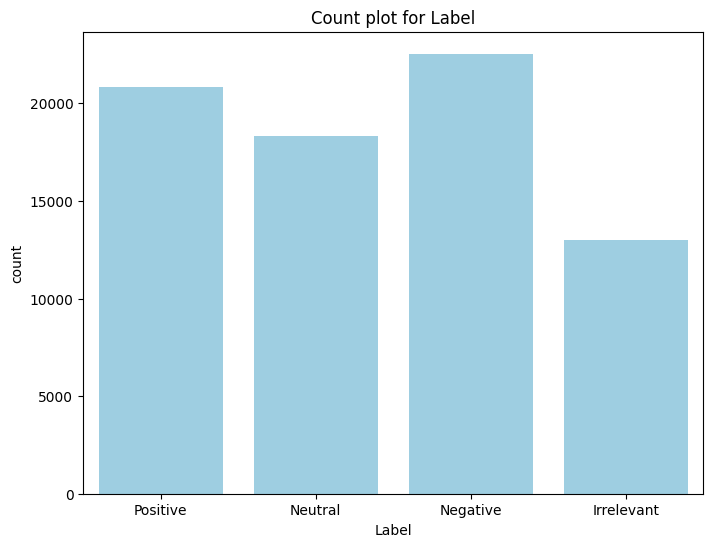

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df_train['Label'], data=df_train, color='skyblue', alpha=0.9)
plt.title(f'Count plot for Label')
plt.style.use('dark_background')
plt.show()

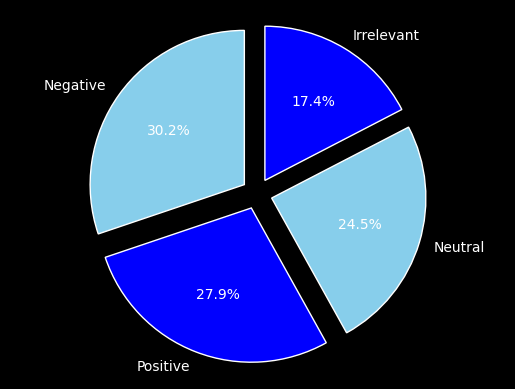

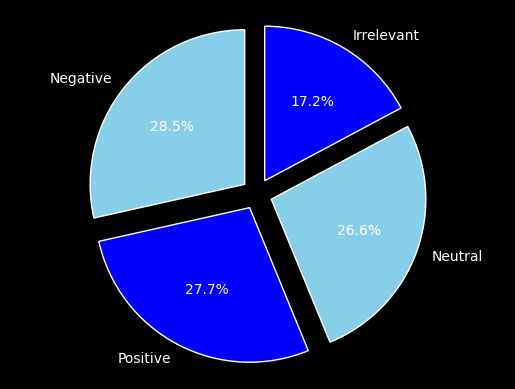

In [13]:
for data in [df_train,df_val]:
    plt.pie(data['Label'].value_counts(),labels=['Negative','Positive', 'Neutral', 'Irrelevant'],
         autopct='%1.1f%%', startangle=90,
         colors=['skyblue', 'blue', 'skyblue', 'blue'],
         explode = (0.1, 0.1, 0.1 , 0.1),
         wedgeprops =  {'edgecolor':"white"})

    plt.axis('equal') 
    plt.style.use('dark_background') 
    plt.show()

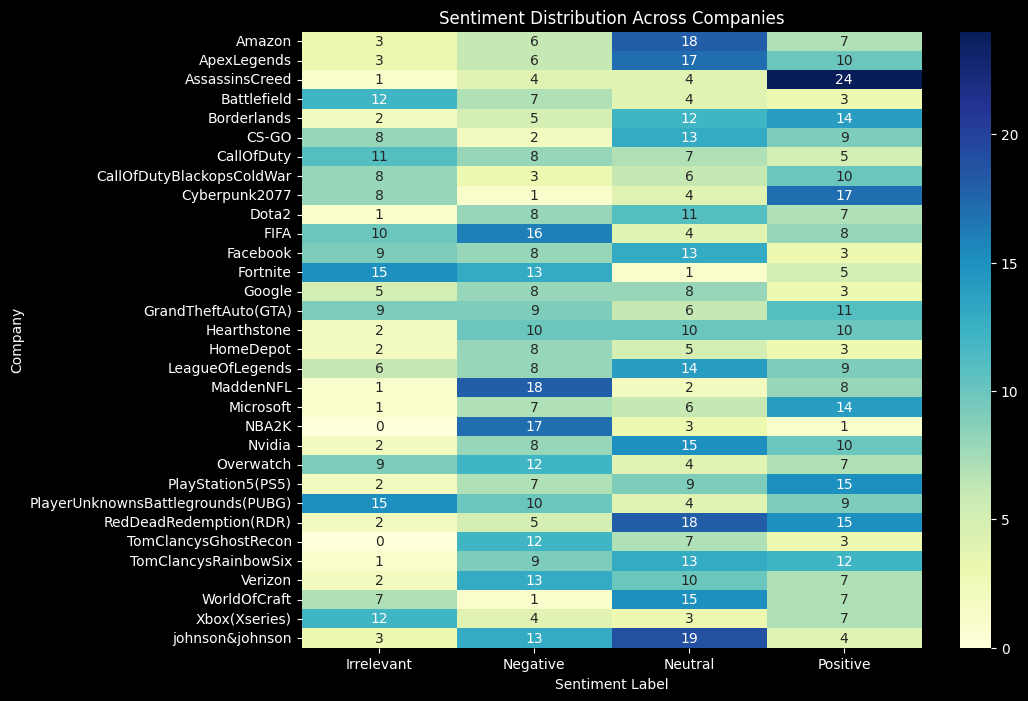

In [14]:

import seaborn as sns

# Assuming you have a column named 'Company' in your DataFrame
plt.figure(figsize=(10, 8))
heatmap_data = df_val.groupby(['Company', 'Label']).size().unstack(fill_value=0)
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Sentiment Distribution Across Companies')
plt.xlabel('Sentiment Label')
plt.ylabel('Company')
plt.show()

In [15]:
label_mapping = {'Positive': 0, 'Negative': 1, 'Neutral': 2, 'Irrelevant': 3}

df_train['Label'] = df_train['Label'].map(label_mapping)
df_val['Label'] = df_val['Label'].map(label_mapping)

encoder = LabelEncoder()

df_train['Label'] = encoder.fit_transform(df_train['Label'])
df_val['Label'] = encoder.transform(df_val['Label'])

df_train.head(15)

,Country,Label,Text
0,Borderlands,0,im getting on borderlands and i will murder yo...
1,Borderlands,0,i am coming to the borders and i will kill you...
2,Borderlands,0,im getting on borderlands and i will kill you all
3,Borderlands,0,im coming on borderlands and i will murder you...
4,Borderlands,0,im getting on borderlands and i will murder y...
5,Borderlands,0,im getting into borderlands and i can murder y...
6,Borderlands,0,so i spent a few hours making something for fu...
7,Borderlands,0,so i spent a couple of hours doing something f...
8,Borderlands,0,so i spent a few hours doing something for fun...
9,Borderlands,0,so i spent a few hours making something for fu...


In [16]:
df_val.head(15)

,Company,Label,Text
0,Facebook,3,i mentioned on facebook that i was struggling ...
1,Amazon,2,bbc news amazon boss jeff bezos rejects claim...
2,Microsoft,1,why do i pay for word when it functions so po...
3,CS-GO,1,csgo matchmaking is so full of closet hacking ...
4,Google,2,now the president is slapping americans in the...
5,FIFA,1,hi ive had madeleine mccann in my cellar for ...
6,MaddenNFL,0,thank you \n\nnew te austin hooper in the ora...
7,TomClancysRainbowSix,0,rocket league sea of thieves or rainbow six si...
8,AssassinsCreed,0,my ass still kneedeep in assassins creed odyss...
9,CallOfDuty,1,fix it jesus please fix it what in the world...


In [17]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
tfidf_vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')

In [18]:
X_train = tfidf_vectorizer.fit_transform(df_train['Text'])
X_val = tfidf_vectorizer.transform(df_val['Text'])

In [19]:
y_train = df_train['Label']
y_val = df_val['Label']

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42) 
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)

In [ ]:

from sklearn.metrics import precision_score, recall_score, f1_score

Y_train_pred = model.predict(X_train)
Y_val_pred = model.predict(X_val)

precision_train = precision_score(y_train, Y_train_pred, average='weighted')
recall_train = recall_score(y_train, Y_train_pred, average='weighted')
f1_train = f1_score(y_train, Y_train_pred, average='weighted')

print("Training Metrics:")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1-score: {f1_train}")

In [ ]:
precision_val = precision_score(y_val, Y_val_pred, average='weighted')
recall_val = recall_score(y_val, Y_val_pred, average='weighted')
f1_val = f1_score(y_val, Y_val_pred, average='weighted')

print("Validation Metrics:")
print(f"Precision: {precision_val}")
print(f"Recall: {recall_val}")
print(f"F1-score: {f1_val}")